[src](http://hunch.net/~mltf/online_linear.pdf)

## VW Default learning params
* --adaptive                   use adaptive, individual learning rates
* --normalized                 use per feature normalized updates.
* --invariant                  use safe/importance aware updates

$\hat{y}$

## (importance weight) invariance
* why: classification, one choice is more important than another
    * predicting *non spam as spam* is a lot worse than predicting *spam as nonspam*
* define $I$ as the importance factor
* baseline update $w_i <- w_i - \eta I \frac{\delta L(\hat{y}_w (x), y)}{\delta w_i}$
* repeated update $w_i <- w_i - \eta \frac{\delta L(\hat{y}_w (x), y)}{\delta w_i}$, I times
* invariant update $w_i <- w_i - S(\eta I) \frac{\delta L(\hat{y}_w (x), y)}{\delta w_i}$

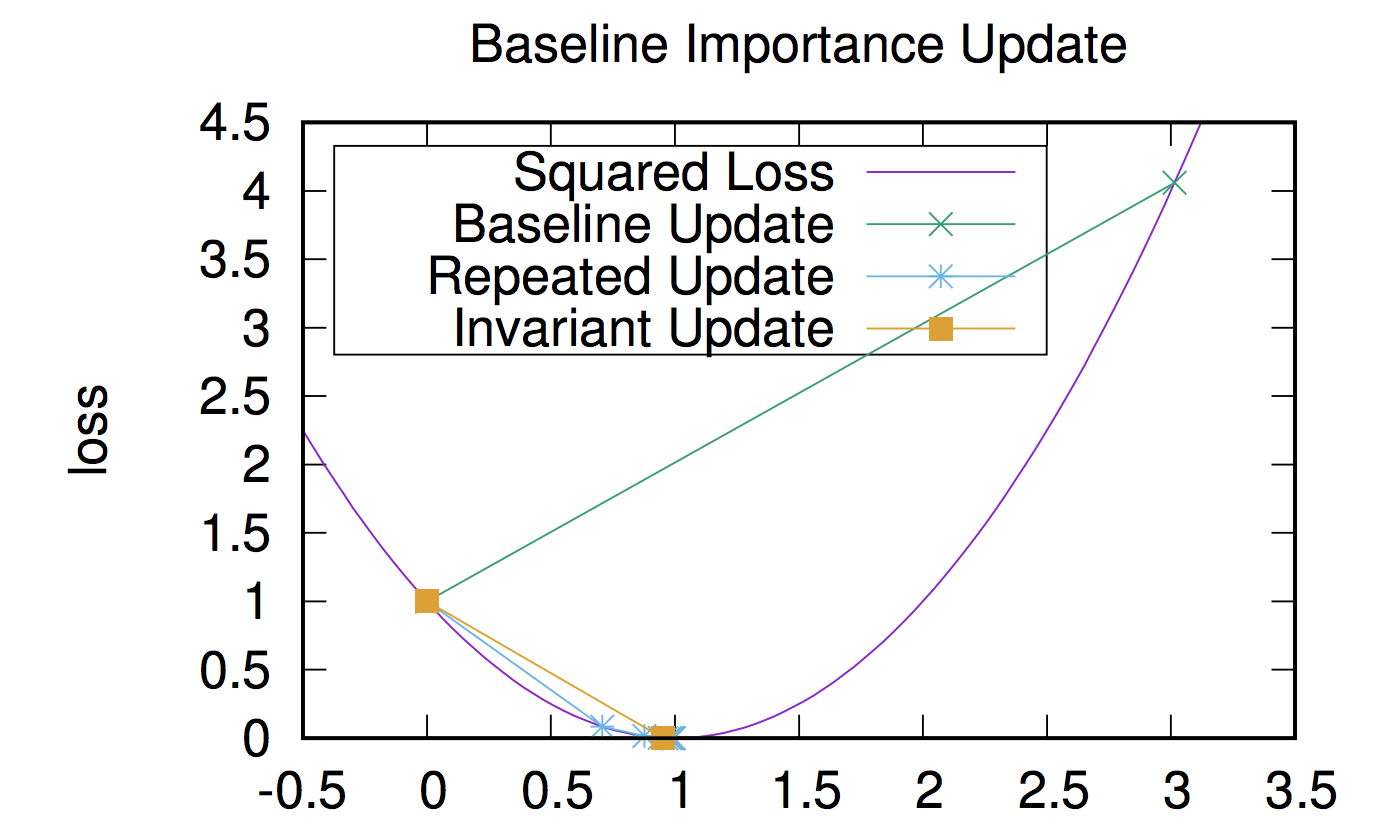

In [2]:
from IPython.display import Image
Image(filename='images/online_importance.png') 

## Adaptive Update
* learning rate needs to decay to converge, usual solutions are $\eta_t = \frac{1}{t^{0.5}}$ or $\eta_t = \frac{1}{t}$
* $w_{it} <- w_{it} - \eta \frac{g_{it}}{\sqrt{\sum_{t'}^t g_{it'}^2}}$, where $g_it$ is the partial derivative $\frac{\delta L(\hat{y}_w (x_t), y_t)}{\delta w_i}$
* common features stablize, rare features get bigger updates
* very similar to RMSProp in modern deep learning

## Normalized Update
* features often have different scales
* $g_{it}$ for squared loss $= 2(\hat{y}_w (x) - y)x_i $
    * $w_i <- w_i -Cx_i$ 
    * doubleing $x_i$, implies halving $w_i$ 

* normally we do standardization $x_i <- \frac{x_i - \mu}{\sigma}$

* scale free update function $w_i <- w_i - \eta \sqrt{\frac{t}{N}} \frac{1}{s^2} \frac{\delta(\hat{y}, y)}{\delta w_i}$
    * $s_i = max_i |x_i|$
    * $N <- N + \sum_i \frac{x_i^2}{s_i^2}$